# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Actividad 7 - Actividad de Integración</center></h1>

Esta actividad busca que los estudiantes conecten el trabajo de agrupación y de resumen, junto con calcular estadísticas de datos así como también realizar visualización básica.

## Instrucciones

Este Notebook contiene las instrucciones a realizar para la actividad. 

<b>Al finalizarla, deben subir el Notebook y los archivos generados en un único archivo .zip, al módulo de la Actividad 07 en Canvas.</b>

Para esta actividad trabajarán con el dataset [palmerpenguins](https://github.com/allisonhorst/palmerpenguins/blob/main/README.md), un set de datos con mediciones de 3 especies de pingüinos que habitan en la Antártica y sus islas. Estos datos incluyen peso, tamaño de las aletas y mediciones del "culmen" para hembras y machos de las 3 especies. (Abajo pueden ver una imagen explicativa sobre estas mediciones.)

<img src="culmen_depth.png" alt="bill_size" width="700"/>

## Rúbrica

- Si han logrado todo: 7.0
- Si han logrado sólo los puntos 1 y 2: 5.0
- Menos que eso: 1.0

## 1. Base de datos unificada

### 1.1 Lectura de datos

En la carpeta `penguins/` podrá encontrar tres archivos `.csv`, cada uno con registros de las mediciones de una especie de pingüino antártico.
Primero, lea cada uno de estos archivos como un DataFrame separado.

### 1.2  Base de datos unificada

Ahora junte los tres DataFrames en un nuevo DataFrame llamado `penguins`, agregando una nueva columna `species` que identifique el nombre de la especie de cada pingüino (Adelie, Chinstrap o Gentoo).

### 1.3 Inspección y limpieza

Inspeccione el DataFrame `penguins` y sus columnas. ¿Están correctamente asignados los tipos de cada columna? ¿Alguna podría ser categórica? ¿Existen valores nulos o inválidos? Aplique las transformaciones y limpiezas que considere necesarisas al DataFrame, explicando en los comentarios (o nuevas celdas) por qué hizo dichas transformaciones.

In [2]:
import pandas as pd

adelie = pd.read_csv("data 2025/adelie.csv")
chinstrap = pd.read_csv("data 2025/chinstrap.csv")
gentoo = pd.read_csv("data 2025/gentoo.csv")

In [3]:
# Unificamos los datasets

adelie["species"] = "Adelie"
chinstrap["species"] = "Chinstrap"
gentoo["species"] = "Gentoo"

penguins = pd.concat([adelie, chinstrap, gentoo], ignore_index=True)
penguins

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,Torgersen,39.1,18.7,181.0,3750.0,MALE,Adelie
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,Adelie
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,Adelie
3,Torgersen,NaN,NaN,NaN,NaN,NaN,Adelie
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,Adelie
...,...,...,...,...,...,...,...
339,Biscoe,NaN,NaN,NaN,NaN,NaN,Gentoo
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,Gentoo
341,Biscoe,50.4,15.7,222.0,5750.0,MALE,Gentoo
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,Gentoo


In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             344 non-null    object 
 1   culmen_length_mm   342 non-null    float64
 2   culmen_depth_mm    342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                334 non-null    object 
 6   species            344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
penguins[penguins.isna().any(axis=1)]

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
3,Torgersen,NaN,NaN,NaN,NaN,NaN,Adelie
8,Torgersen,34.1,18.1,193.0,3475.0,NaN,Adelie
9,Torgersen,42.0,20.2,190.0,4250.0,NaN,Adelie
10,Torgersen,37.8,17.1,186.0,3300.0,NaN,Adelie
11,Torgersen,37.8,17.3,180.0,3700.0,NaN,Adelie
47,Dream,37.5,18.9,179.0,2975.0,NaN,Adelie
246,Biscoe,44.5,14.3,216.0,4100.0,NaN,Gentoo
286,Biscoe,46.2,14.4,214.0,4650.0,NaN,Gentoo
324,Biscoe,47.3,13.8,216.0,4725.0,NaN,Gentoo
339,Biscoe,NaN,NaN,NaN,NaN,NaN,Gentoo


In [6]:
# Eliminamos filas con valores nulos
penguins = penguins.dropna()

In [7]:
penguins.sex.unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [8]:
# Nos deshacemos de los valores "invalidos"
penguins = penguins[penguins.sex.isin(["MALE", "FEMALE"])]
penguins

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,Torgersen,39.1,18.7,181.0,3750.0,MALE,Adelie
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,Adelie
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,Adelie
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,Adelie
5,Torgersen,39.3,20.6,190.0,3650.0,MALE,Adelie
...,...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,Gentoo
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,Gentoo
341,Biscoe,50.4,15.7,222.0,5750.0,MALE,Gentoo
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,Gentoo


In [9]:
# Tanto `species` como `sex` podrían ser columnas categóricas.
penguins["species"] = penguins["species"].astype("category")
penguins["sex"] = penguins['sex'].astype("category")

## 2. Revisión de base de datos

### 2.1 Análisis de base completa

Responda las siguientes preguntas a partir del DataFrame `penguins`:
* a. ¿Cuántas filas tiene la base de datos conjunta?
* b. ¿Cuáles son los valores mínimo y máximo de todas las columnas con datos numéricos?
* c. ¿Cuántos machos y cuántas hembras hay en el set de datos, respectivamente?

### 2.2 Análisis agrupados

Responda las siguientes preguntas:

* a. En promedio, ¿cuál es la especie más pesada de pingüino?
* b. Para cada especie, ¿hay alguna diferencia significativa entre hembras y machos en relación al peso promedio?
* c. ¿En qué especie varía menos el tamaño de aleta?

In [10]:
# 2.1.a
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   island             333 non-null    object  
 1   culmen_length_mm   333 non-null    float64 
 2   culmen_depth_mm    333 non-null    float64 
 3   flipper_length_mm  333 non-null    float64 
 4   body_mass_g        333 non-null    float64 
 5   sex                333 non-null    category
 6   species            333 non-null    category
dtypes: category(2), float64(4), object(1)
memory usage: 16.5+ KB


(2.1.a) Tenemos 333 filas en nuestro dataset.

In [11]:
# 2.1.b
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [12]:
# 2.1.c
penguins.sex.value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [13]:
# 2.2.a
# Agrupamos segun especie
penguins.groupby(["species"]).agg({"body_mass_g": ["mean"]})

,body_mass_g
,mean
species,
Adelie,3706.164384
Chinstrap,3733.088235
Gentoo,5092.436975


Los Gentoo son los más pesados en promedio.

In [14]:
# 2.2.b
# Agrupamos segun sexo y especie
penguins.groupby(["species", "sex"]).agg({"body_mass_g": ["mean"]})

body_mass_g
                         mean
species   sex                
Adelie    FEMALE  3368.835616
          MALE    4043.493151
Chinstrap FEMALE  3527.205882
          MALE    3938.970588
Gentoo    FEMALE  4679.741379
          MALE    5484.836066

Para todas las especies, los machos son más pesados que las hembras.

In [15]:
# 2.2.c
# Agrupamos segun especie
penguins.groupby(["species"]).agg({"flipper_length_mm": ["std"]})

,flipper_length_mm
,std
species,
Adelie,6.521825
Chinstrap,7.131894
Gentoo,6.585431


Los pingüinos de Adelie tienen la menor variación en tamaño de aleta.

## 3. Análisis exploratorio

### 3.1 Estadísticas de resumen

Elija una de las tres especies y responda las siguientes preguntas solamente para la especie elegida:

* a. ¿Cuál es el coeficiente de correlación entre `culmen_length` y `flipper_length`? ¿Qué nos indica este valor? Comente.
* b. ¿Cual es el peso máximo del percentil 10 (el decil más bajo) para los machos?
* c. ¿Cuál es la varianza de `culmen_depth` para las hembras?

### 3.2 Visualización

Utilizando la librería de visualización de su preferencia (matplotlib, seaborn, plotly), genere los siguientes gráficos:

* a. Un scatterplot que relacione las variables `culmen_length` y `flipper_length` para las tres especies. Utilice colores distintos para diferenciar las especies entre sí.
* b. Un histograma que muestre la distribución de peso para pingüinos macho y hembra. Utilice colores distintos para diferenciar los dos grupos.

Analice y comente los resultados que obtuvo. No olvide colocar título y nombres claros a los ejes de sus gráficos.

In [16]:
# 3.1.a - Seleccionar una sola especie! (Pauta muestra las 3 opciones)

for s in ['Adelie', 'Chinstrap', 'Gentoo']:
    data = penguins[penguins['species'] == s]
    corr = data.culmen_length_mm.corr(data.flipper_length_mm)
    print(f"Correlación para {s}: {corr}")

Correlación para Adelie: 0.33227396209561455
Correlación para Chinstrap: 0.4716072789779736
Correlación para Gentoo: 0.6642052399432087


* (Adelie) Hay una correlación leve entre largo de culmen y aleta.
* (Chinstrap) Hay una correlación media entre largo de culmen y aleta
* (Gentoo) Hay una correlación notable entre largo de culmen y aleta (si una variable sube, es muy probable que la otra también)

In [17]:
# 3.1.b - Seleccionar una sola especie! (Pauta muestra las 3 opciones)
for s in ['Adelie', 'Chinstrap', 'Gentoo']:
    data = penguins[(penguins['species'] == s) & (penguins['sex']== 'MALE')]
    quant = data.body_mass_g.quantile(0.9)
    print(f"Peso más alto (decil 10) para machos de {s}: {quant} gramos")

Peso más alto (decil 10) para machos de Adelie: 4495.0 gramos
Peso más alto (decil 10) para machos de Chinstrap: 4435.0 gramos
Peso más alto (decil 10) para machos de Gentoo: 5850.0 gramos


In [18]:
# 3.1.c - Seleccionar una sola especie! (Pauta muestra las 3 opciones)
for s in ['Adelie', 'Chinstrap', 'Gentoo']:
    data = penguins[(penguins['species'] == s) & (penguins['sex']== 'FEMALE')]
    var = data.culmen_depth_mm.var()
    print(f"Varianza de profundidad de culmen para hembras de {s}: {var}")

Varianza de profundidad de culmen para hembras de Adelie: 0.8892351598173511
Varianza de profundidad de culmen para hembras de Chinstrap: 0.6101604278074858
Varianza de profundidad de culmen para hembras de Gentoo: 0.29186932849364805


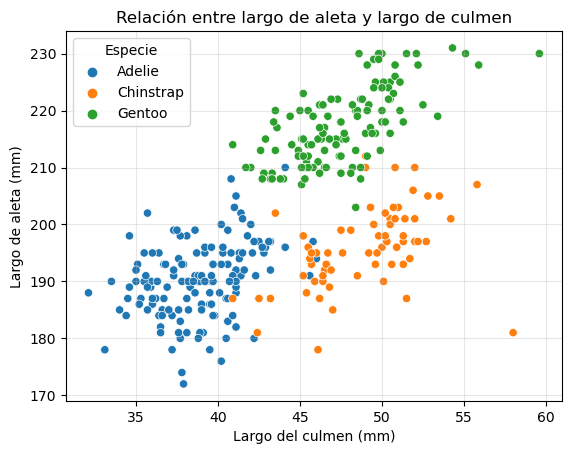

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3.2.a
sns.scatterplot(data=penguins, x="culmen_length_mm", y="flipper_length_mm", hue="species")
plt.title("Relación entre largo de aleta y largo de culmen")
plt.xlabel("Largo del culmen (mm)")
plt.ylabel("Largo de aleta (mm)")
plt.legend(title="Especie")
plt.grid(alpha=0.3)
plt.show()

Podemos identificar 3 clusters que corresponden a las 3 especies. Además, se nota que la correlación entre estas variables es baja para los pingüinos de Adelie, pero mayor para los Gentoo y Chinstrap, ya que empezamos a ver una pendiente ascendente en la distribución de los puntos.

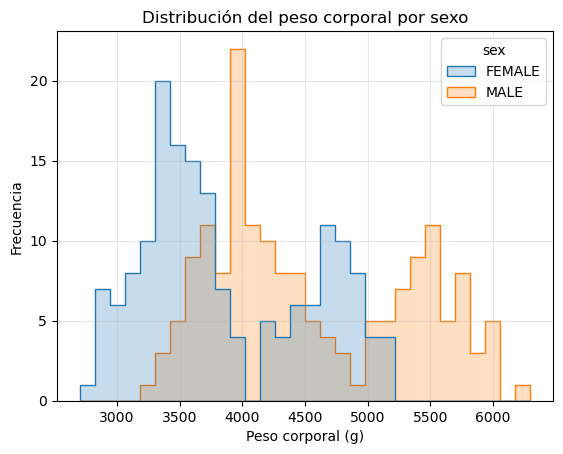

In [20]:
sns.histplot(data=penguins, x="body_mass_g", hue="sex", element="step", bins=30)
plt.title("Distribución del peso corporal por sexo")
plt.xlabel("Peso corporal (g)")
plt.ylabel("Frecuencia")
# plt.legend(title="Sexo")
plt.grid(alpha=0.3)
plt.show()

Nuevamente, vemos que la distribución de peso de los pingüinos macho está desplazada a la derecha en comparación con la distribución de las hembras. Además, ambos histogramas aparecen como "bimodales", ya que estamos graficando a las 3 especies de pingüinos juntos, y sabemos que existen diferencias notables entre el peso de los Adelie/Chinstrap (más livianos) y los Gentoo (más pesados).